
IMPORTING THE DEPENDENCIES

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#classifcation models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing the perforamnces evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Data Collection and Processing**

In [33]:
#loading the dataset to the Pandas
df = pd.read_csv('/content/card_transdata.csv')
pd.set_option('display.max_columns', None)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [34]:
#checking the first five rows of the dataset
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [35]:
#checking the last five tails of the dataset
df.tail()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


**Variable Description**

Here are the descriptions of the variables in your **CREDIT CARD FRAUD** dataset:

1. **distance_from_home**: This variable measures the physical distance between the location of the transaction and the cardholder's home address. It can be used to detect unusual or potentially fraudulent transactions that occur far from the cardholder's usual location.

2. **distance_from_last_transaction**: This variable indicates the distance between the current transaction location and the location of the previous transaction made by the cardholder. Large distances between consecutive transactions in a short time frame may signal suspicious activity.

3. **ratio_to_median_purchase_price**: This variable represents the ratio of the transaction amount to the median purchase price for that cardholder. It can help identify transactions that are significantly higher or lower than the cardholder's usual spending pattern, which could indicate fraud.

4. **repeat_retailer**: This is a binary variable indicating whether the cardholder has made transactions at the same retailer multiple times. Fraudsters often attempt multiple transactions at the same location to test the card's validity.

5. **used_chip**: This binary variable indicates whether the transaction was completed using the card's chip technology. Chip transactions are generally considered more secure than magnetic stripe transactions.

6. **used_pin_number**: This binary variable indicates whether a PIN (Personal Identification Number) was used to authorize the transaction. Transactions authorized by PIN are more secure than those without.

7. **online_order**: This binary variable indicates whether the transaction was an online order. Online transactions are more susceptible to fraud compared to in-person transactions.

8. **fraud**: This is the target variable indicating whether the transaction is fraudulent (1) or legitimate (0). It is used in fraud detection models to classify transactions.



In [36]:
# get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          -------

In [37]:
#features of the dataFrame
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [38]:
#The number of rows and columns of the dataFrame
df.shape

(1000000, 8)

(1000000, 8)

In [39]:
#checking for missing value in each feature of the dataFrame
df.isna().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [40]:
#filling in for misssing values using forward fill
missing_val = ['used_chip', 'used_pin_number', 'online_order','fraud','ratio_to_median_purchase_price','repeat_retailer','distance_from_last_transaction']


for feature in missing_val:
  df[feature].fillna(method = 'ffill', inplace = True)

<ipython-input-9-fc698b6a6328>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(method = 'ffill', inplace = True)
<ipython-input-9-fc698b6a6328>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[feature].fillna(method = 'ffill', inplace = True)
<ipython-input-40-fc698b6a6328>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior

In [41]:
df['used_chip'].isna().sum()

0

0

In [42]:
#checking for missing value in each feature of the dataFrame
df.isna().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [43]:
#printing the first five rows of the DataFrame
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [44]:
df['fraud'].dtype

dtype('float64')

dtype('float64')

In [45]:
#converting some of the columns in float 64 to int 64
convertable_col = ['used_chip', 'used_pin_number', 'online_order','fraud','repeat_retailer']

for col in convertable_col:
  df[col] = df[col].convert_dtypes('Int64')

In [46]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [47]:
df['used_chip'].value_counts()

,count
used_chip,
0,649601
1,350399


,count
used_chip,
0,649601
1,350399


DATA VISUALIZATION

In [48]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


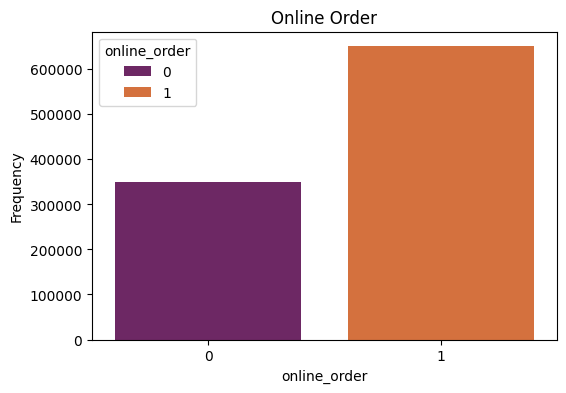

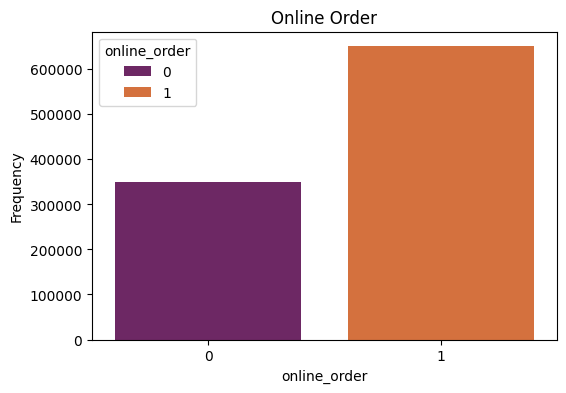

In [49]:
#let viaualize the online_order column
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'online_order', palette= 'inferno', hue = 'online_order')
plt.ylabel('Frequency')
#plt.legend(['Female','Male'])
plt.title('Online Order')
plt.show()

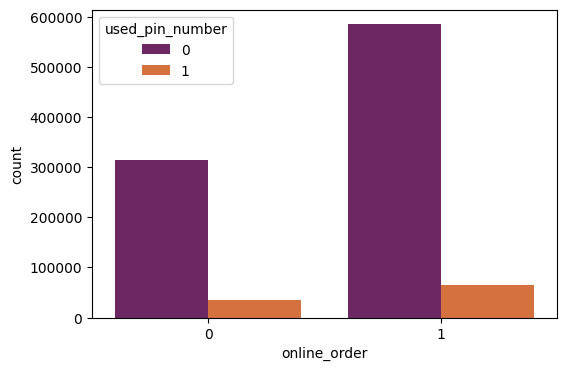

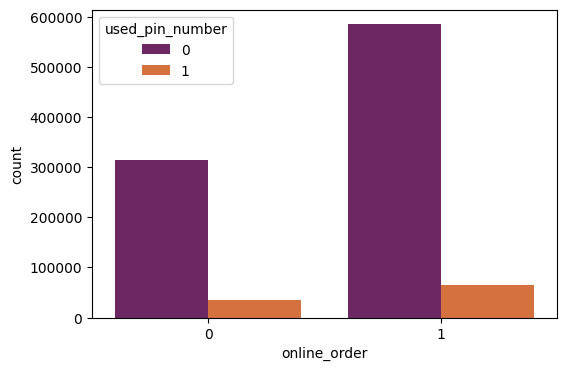

In [50]:
#bivariate analaysis
plt.style.use('fast')
plt.figure(figsize= (6,4))
sns.countplot(data = df, x = 'online_order', palette = 'inferno', hue = 'used_pin_number')
plt.show()

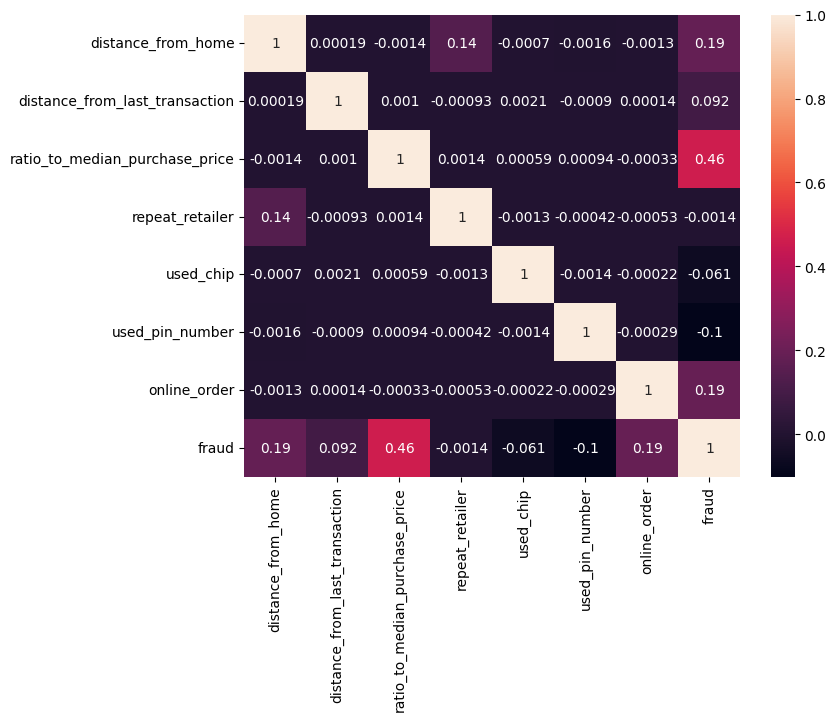

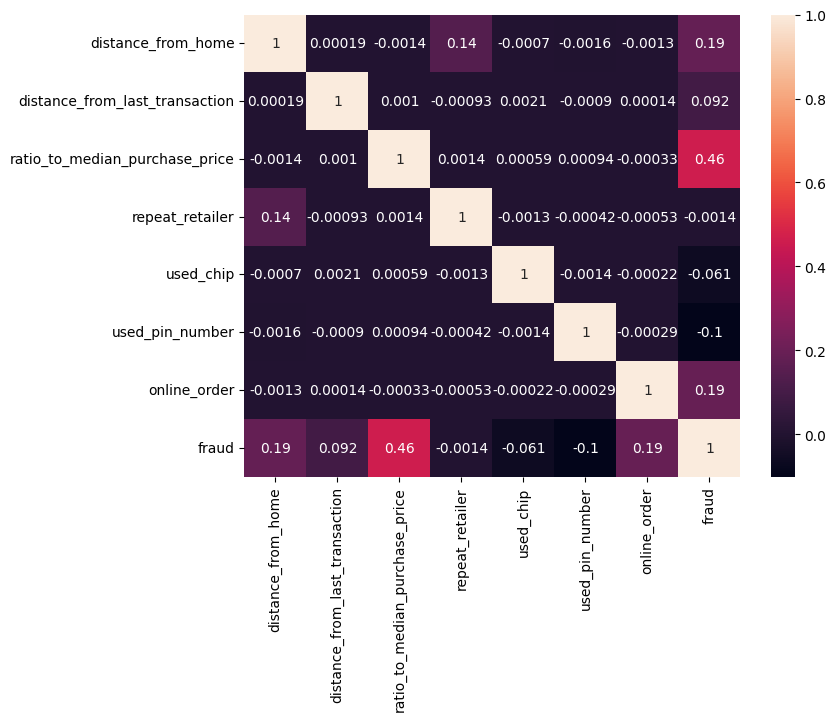

In [51]:
# checking for the correlation between variables in the dataset
df.corr()
# using the heatmap to visulize the correlation between variables in the dataset
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

**FEATURE SELECTION**

In [52]:
X = df.drop(['fraud'], axis = 1)
Y = df['fraud']

In [53]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1


In [54]:
Y.value_counts()

,count
fraud,
0,912597
1,87403


,count
fraud,
0,912597
1,87403


**Data Sampling**

1. Undersampling   
2. Oversampling

In [55]:
#oversamppling the target variable
#importing the Randomoversampler
from imblearn.over_sampling import RandomOverSampler

# Define the oversampler
ros = RandomOverSampler(sampling_strategy=1, random_state=42)
# Perform the oversampling
x_res, y_res = ros.fit_resample(X, Y)

# Combine back into a single DataFrame if needed
df_over_sampled = pd.concat([x_res, y_res], axis=1)

# Verify the class distribution
print(df_over_sampled ['fraud'].value_counts())

fraud
0    912597
1    912597
Name: count, dtype: Int64
fraud
0    912597
1    912597
Name: count, dtype: Int64


In [56]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)

# Perform the undersampling
x_res, y_res = rus.fit_resample(X, Y)

# Combine back into a single DataFrame if needed
df_under_sample = pd.concat([x_res, y_res], axis=1)

# Verify the class distribution
print(df_under_sample['fraud'].value_counts())

fraud
0    87403
1    87403
Name: count, dtype: Int64
fraud
0    87403
1    87403
Name: count, dtype: Int64


In [57]:
# viewing the sampled dataframe
df_over_sampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
1825189,14.362119,0.401562,21.530810,1,0,0,1,1
1825190,134.028811,0.572274,8.459345,1,0,0,1,1
1825191,11.493695,0.169370,4.955539,1,0,0,1,1
1825192,4.026412,0.328626,4.933341,1,0,0,1,1


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
1825189,14.362119,0.401562,21.530810,1,0,0,1,1
1825190,134.028811,0.572274,8.459345,1,0,0,1,1
1825191,11.493695,0.169370,4.955539,1,0,0,1,1
1825192,4.026412,0.328626,4.933341,1,0,0,1,1


In [58]:
# selecting the independent  variables to x
x = df_over_sampled.drop(columns=['fraud'], axis=1)
y = df_over_sampled['fraud']

**Data Normalization or Data Scaling**

In [59]:
# importing the MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [60]:
#viewing the x variable
x_scaled

array([[5.44291477e-03, 2.62441132e-05, 7.25000486e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01809034e-03, 1.48064867e-05, 4.81638009e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.78354145e-04, 6.79290539e-05, 1.58072302e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.08051578e-03, 1.42815506e-05, 1.84883007e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.78222855e-04, 2.77195821e-05, 1.84054086e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.34213101e-03, 2.68139651e-04, 4.84664429e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

array([[5.44291477e-03, 2.62441132e-05, 7.25000486e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01809034e-03, 1.48064867e-05, 4.81638009e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.78354145e-04, 6.79290539e-05, 1.58072302e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.08051578e-03, 1.42815506e-05, 1.84883007e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.78222855e-04, 2.77195821e-05, 1.84054086e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.34213101e-03, 2.68139651e-04, 4.84664429e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

**Splitting the Dataset into Training and Test Data**

In [61]:
# spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(1000000, 7) (1460155, 7) (365039, 7)


In [ ]:
models = [LogisticRegression(max_iter= 1000), SVC(kernel = 'linear'), KNeighborsClassifier(), RandomForestClassifier()]

**MODEL TRAINING AND PREDICTION**

In [ ]:
def compare_models_train_test2():

  for model in models:

    #training the model
    model.fit(X_train, y_train)

    #evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)
    if isinstance(model, LogisticRegression):
        print('Accuracy Score of the Logistic Regression Model = ', accuracy*100)
    elif isinstance(model, SVC):
        print('Accuracy Score of the Support Vector Machine Model = ', accuracy*100)
    elif isinstance(model, KNeighborsClassifier):
        print('Accuracy Score of the KNeignor Model = ', accuracy*100)
    else:
        print('Accuracy Score of the Random Forest Model = ', accuracy*100)

In [62]:
# Create a dictionary to store the classification models
models = {
    #'SVC': SVC(kernel='poly'),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter= 1000)
}

In [ ]:
# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy for the test data
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # using the classification Report to evaluate model
    print(f'{model_name}: Classification Report')
    print(classification_report(y_test, predictions))

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")

RandomForest Accuracy: 1.0
RandomForest: Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182421
         1.0       1.00      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039

RandomForest Confusion Matrix:
[[182421,      0],
 [     0, 182618]]




**MODEL 1**

**TRAINING THE RANDOM FOREST MODEL**

In [ ]:
# Importing the Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model training phase
classifier = RandomForestClassifier()
model =classifier.fit(x_train, y_train)

In [ ]:
model.predict(x_train)

array([0., 0., 0., ..., 0., 0., 0.])

**Evaluating the Random forest Train and Test Accuracy**

In [ ]:
# Evaluating the model using the x_train
y_pred = model.predict(x_train)
train_accuracy =accuracy_score(y_pred, y_train)
print(f'The model training accuarcy is', train_accuracy)

The model training accuarcy is 1.0


In [ ]:
# evlauting the model using the test data
y_pred_test = model.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(y_pred_test, y_test )
print('The model testing accuracy is', test_accuracy)

The model testing accuracy is 1.0


**Evaluating the performance of the Random Forest Classifier Model using Precision, F1_score Recall and Accuracy**

In [ ]:
# using the classification Report to evaluate the Random forest model
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182421
         1.0       1.00      1.00      1.00    182618

    accuracy                           1.00    365039
   macro avg       1.00      1.00      1.00    365039
weighted avg       1.00      1.00      1.00    365039



**Bulding A Predictive System Using The Best Model**

In [ ]:
input_data =(2.131955665990563,56.3724005365082,6.358667321630612,1.0,0.0,0.0,1.0)
# converting the input data into numpy arrays

input_data_as_array =np.asarray(input_data )
# reshape the array as we are predicting for one patient
input_data_reshaped = input_data_as_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

# Making the prediction
prediction = model.predict(std_data)
print(prediction)

if(prediction[0]==0):
   print('Not Fradulent')
else:
  print('Fradulent')
print()
print()


[[2.00050554e-04 4.75671128e-03 2.37277918e-02 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[1.]
Fradulent




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
